<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Table of Contents</a></span></li><li><span><a href="#Categorical-Data" data-toc-modified-id="Categorical-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Categorical Data</a></span><ul class="toc-item"><li><span><a href="#Background" data-toc-modified-id="Background-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Background</a></span></li><li><span><a href="#Categorical-type-in-pandas" data-toc-modified-id="Categorical-type-in-pandas-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Categorical type in pandas</a></span></li><li><span><a href="#Computations-with-Categoricals" data-toc-modified-id="Computations-with-Categoricals-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Computations with Categoricals</a></span></li><li><span><a href="#Categorical-methods" data-toc-modified-id="Categorical-methods-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Categorical methods</a></span></li><li><span><a href="#Creating-dummy-variables-for-modeling" data-toc-modified-id="Creating-dummy-variables-for-modeling-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Creating dummy variables for modeling</a></span></li></ul></li><li><span><a href="#Advanced-GroupBy-use" data-toc-modified-id="Advanced-GroupBy-use-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Advanced GroupBy use</a></span><ul class="toc-item"><li><span><a href="#Transform" data-toc-modified-id="Transform-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Transform</a></span></li><li><span><a href="#Grouped-time-resampling" data-toc-modified-id="Grouped-time-resampling-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Grouped time resampling</a></span></li></ul></li><li><span><a href="#Techniques-for-method-chaining" data-toc-modified-id="Techniques-for-method-chaining-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Techniques for method chaining</a></span></li></ul></div>

In [1]:
import numpy as np
import pandas as pd

# Categorical Data

## Background

- A column in a table can contain repeated instances of a smaller set of distinct values
- Categorical data used in df and series can lead to increase in performance and
reduction in memory

In [3]:
values = pd.Series(['apple', 'orange', 'apple', 'apple'] * 2)
values

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
dtype: object

In [4]:
pd.unique(values)

array(['apple', 'orange'], dtype=object)

In [6]:
pd.value_counts(values)

apple     6
orange    2
dtype: int64

In [7]:
# We can represent categorical data more efficiently with "dictionary-encoded"
# representations.

# categories = levels
values = pd.Series([0, 1, 0, 0] * 2)
dim = pd.Series(['apple', 'orange'])
dim.take(values)

0     apple
1    orange
0     apple
0     apple
0     apple
1    orange
0     apple
0     apple
dtype: object

## Categorical type in pandas

In [10]:
fruits = ['apple', 'orange', 'apple', 'apple'] * 2

N = len(fruits)

# Note that the order of the columns relies on the dictionary being evaluated
# by sorted key.
df = pd.DataFrame(
    {
        'fruit': fruits,
        'basket_id': np.arange(N),
        'count': np.random.randint(3, 15, size=N),
        'weight': np.random.uniform(0, 4, size=N)
    },
    columns='basket_id fruit count weight'.split())

df

,basket_id,fruit,count,weight
0,0,apple,8,3.418136
1,1,orange,12,0.736905
2,2,apple,4,2.104905
3,3,apple,12,1.132932
4,4,apple,9,3.303072
5,5,orange,14,1.752396
6,6,apple,11,0.922695
7,7,apple,14,3.452208


In [11]:
# The columns is an array of string objects.
df['fruit']

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: object

In [21]:
fruit_col = df['fruit']

print("fruit_col.values=", fruit_col.values)
print("type(fruit_col.values)=", type(fruit_col.values))
print("fruit_col.values[0]=",type(fruit_col.values[0]), fruit_col.values[0])

fruit_col.values= ['apple' 'orange' 'apple' 'apple' 'apple' 'orange' 'apple' 'apple']
type(fruit_col.values)= <type 'numpy.ndarray'>
fruit_col.values[0]= <type 'str'> apple


In [13]:
# Convert into a category.
fruit_cat = df['fruit'].astype('category')
fruit_cat

0     apple
1    orange
2     apple
3     apple
4     apple
5    orange
6     apple
7     apple
Name: fruit, dtype: category
Categories (2, object): [apple, orange]

In [23]:
fruit_col = fruit_cat

print("fruit_col.values=", fruit_col.values)
print("type(fruit_col.values)=", type(fruit_col.values))
print("fruit_col.values[0]=",type(fruit_col.values[0]), fruit_col.values[0])

fruit_col.values= [apple, orange, apple, apple, apple, orange, apple, apple]
Categories (2, object): [apple, orange]
type(fruit_col.values)= <class 'pandas.core.categorical.Categorical'>
fruit_col.values[0]= <type 'str'> apple


In [26]:
# Show the encoding.
c = fruit_cat.values

print(c.categories)
print(c.codes)

Index([u'apple', u'orange'], dtype='object')
[0 1 0 0 0 1 0 0]


In [29]:
# Create categorical data from other sequences.

my_categories = pd.Categorical('foo bar baz foo bar'.split())

my_categories

[foo, bar, baz, foo, bar]
Categories (3, object): [bar, baz, foo]

In [31]:
# Create categorical data from categories and codes.

categories = 'foo bar baz'.split()
codes = [0, 1, 2, 0, 0, 1]
my_cats_2 = pd.Categorical.from_codes(codes, categories)

my_cats_2

[foo, bar, baz, foo, foo, bar]
Categories (3, object): [foo, bar, baz]

In [32]:
# We can indicate that categories have a meaningful ordering.

ordered_cat = pd.Categorical.from_codes(codes, categories, ordered=True)

ordered_cat

[foo, bar, baz, foo, foo, bar]
Categories (3, object): [foo < bar < baz]

## Computations with Categoricals

In [35]:
np.random.seed(12345)

draws = np.random.randn(1000)

draws[:5]

array([-0.20470766,  0.47894334, -0.51943872, -0.5557303 ,  1.96578057])

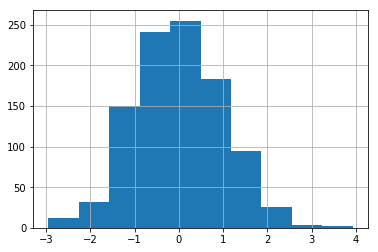

In [40]:
pd.Series(draws).hist()

In [65]:
# Split in 4 bins using quantiles.
bins = pd.qcut(draws, 4)
bins

[(-0.684, -0.0101], (-0.0101, 0.63], (-0.684, -0.0101], (-0.684, -0.0101], (0.63, 3.928], ..., (-0.0101, 0.63], (-0.684, -0.0101], (-2.95, -0.684], (-0.0101, 0.63], (0.63, 3.928]]
Length: 1000
Categories (4, interval[float64]): [(-2.95, -0.684] < (-0.684, -0.0101] < (-0.0101, 0.63] < (0.63, 3.928]]

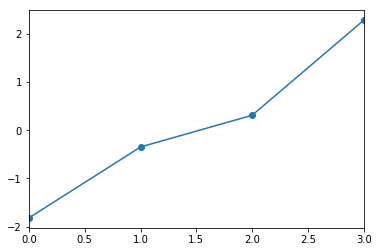

In [66]:
x = pd.Series(sorted([x.mid for x in bins.get_values()])).unique()
x = pd.Series(x)
x.plot(marker="o")

In [73]:
# Assign labels to the quantiles.
bins = pd.qcut(draws, 4, labels="Q1 Q2 Q3 Q4".split())
bins

[Q2, Q3, Q2, Q2, Q4, ..., Q3, Q2, Q1, Q3, Q4]
Length: 1000
Categories (4, object): [Q1 < Q2 < Q3 < Q4]

In [74]:
bins.codes[:10]

array([1, 2, 1, 1, 3, 3, 2, 2, 3, 3], dtype=int8)

In [83]:
srs = pd.Series(bins, name="quartile")

srs.head()

0    Q2
1    Q3
2    Q2
3    Q2
4    Q4
Name: quartile, dtype: category
Categories (4, object): [Q1 < Q2 < Q3 < Q4]

In [85]:
# We can use the bins to groupby.
results = pd.Series(srs).groupby(bins).agg(['count', 'min', max]).reset_index()

results

,index,count,min,max
0,Q1,250,Q1,Q1
1,Q2,250,Q2,Q2
2,Q3,250,Q3,Q3
3,Q4,250,Q4,Q4


In [87]:
# The column retains categorical information.
results['index']

0    Q1
1    Q2
2    Q3
3    Q4
Name: index, dtype: category
Categories (4, object): [Q1 < Q2 < Q3 < Q4]

## Categorical methods

In [88]:
s = pd.Series('a b c d'.split() * 2)

cat_s = s.astype('category')
cat_s

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): [a, b, c, d]

In [90]:
# Use .cat to access categorical methods.
cat_s.cat.codes

0    0
1    1
2    2
3    3
4    0
5    1
6    2
7    3
dtype: int8

In [91]:
cat_s.cat.categories

Index([u'a', u'b', u'c', u'd'], dtype='object')

In [ ]:
# .set_categories() allows to increase the number of possible categories.
# .remove_unused_categories()

## Creating dummy variables for modeling

- Often in statistics or ML one transforms categorical data into dummy vars,
  aka one-hot encoding

In [93]:
cat_s = pd.Series('a b c d'.split() * 2, dtype='category')

cat_s

0    a
1    b
2    c
3    d
4    a
5    b
6    c
7    d
dtype: category
Categories (4, object): [a, b, c, d]

In [94]:
pd.get_dummies(cat_s)

,a,b,c,d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,1,0,0
6,0,0,1,0
7,0,0,0,1


# Advanced GroupBy use

## Transform

- apply() is applied to grouped operations
- transform() is similar to apply() but imposes more constraints
  1) it can produce a scalar value to be broadcasted to the shape of the group
  2) it can produce an object of the same shape of the group
  3) it must not mutate its input

In [95]:
df = pd.DataFrame({'key': 'a b c'.split() * 4,
                   'value': np.arange(12.0)})

df

,key,value
0,a,0.0
1,b,1.0
2,c,2.0
3,a,3.0
4,b,4.0
5,c,5.0
6,a,6.0
7,b,7.0
8,c,8.0
9,a,9.0


In [108]:
g = df.groupby('key').value

g.mean()

key
a    4.5
b    5.5
c    6.5
Name: value, dtype: float64

In [109]:
# If we want to produce a series with the same shape, but with values replaced
# by average grouped by 'key'.
# g.transform('mean')
g.transform(lambda x: x.mean())

0     4.5
1     5.5
2     6.5
3     4.5
4     5.5
5     6.5
6     4.5
7     5.5
8     6.5
9     4.5
10    5.5
11    6.5
Name: value, dtype: float64

In [110]:
def normalize(x):
    return (x - x.mean()) / x.std()


g.transform(normalize)

0    -1.161895
1    -1.161895
2    -1.161895
3    -0.387298
4    -0.387298
5    -0.387298
6     0.387298
7     0.387298
8     0.387298
9     1.161895
10    1.161895
11    1.161895
Name: value, dtype: float64

## Grouped time resampling

- resample() is a group operation based on time intrvalization

In [113]:
n = 15
times = pd.date_range('2017-05-20 00:00', freq='1min', periods=n)

df = pd.DataFrame({'time': times,
                  'value': np.arange(n)})

df

,time,value
0,2017-05-20 00:00:00,0
1,2017-05-20 00:01:00,1
2,2017-05-20 00:02:00,2
3,2017-05-20 00:03:00,3
4,2017-05-20 00:04:00,4
5,2017-05-20 00:05:00,5
6,2017-05-20 00:06:00,6
7,2017-05-20 00:07:00,7
8,2017-05-20 00:08:00,8
9,2017-05-20 00:09:00,9


In [114]:
df.set_index('time').resample('5min').count()

,value
time,
2017-05-20 00:00:00,5
2017-05-20 00:05:00,5
2017-05-20 00:10:00,5


In [116]:
df2 = pd.DataFrame({
    'time': times.repeat(3),
    'key': np.tile('a b c'.split(), n),
    'value': np.arange(n * 3.0)
})

df2[:7]

,key,time,value
0,a,2017-05-20 00:00:00,0.0
1,b,2017-05-20 00:00:00,1.0
2,c,2017-05-20 00:00:00,2.0
3,a,2017-05-20 00:01:00,3.0
4,b,2017-05-20 00:01:00,4.0
5,c,2017-05-20 00:01:00,5.0
6,a,2017-05-20 00:02:00,6.0


In [118]:
time_key = pd.TimeGrouper('5min')

resampled = (df2.set_index('time')
             .groupby(['key', time_key])
             .sum())

resampled

value
key time                      
a   2017-05-20 00:00:00   30.0
    2017-05-20 00:05:00  105.0
    2017-05-20 00:10:00  180.0
b   2017-05-20 00:00:00   35.0
    2017-05-20 00:05:00  110.0
    2017-05-20 00:10:00  185.0
c   2017-05-20 00:00:00   40.0
    2017-05-20 00:05:00  115.0
    2017-05-20 00:10:00  190.0

# Techniques for method chaining